In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_data = pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")

# Check first 5 rows of training data
train_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [3]:
# Count fraud and non-fraud transactions
train_data['is_fraud'].value_counts()


,count
is_fraud,
0.0,269497
1.0,2036


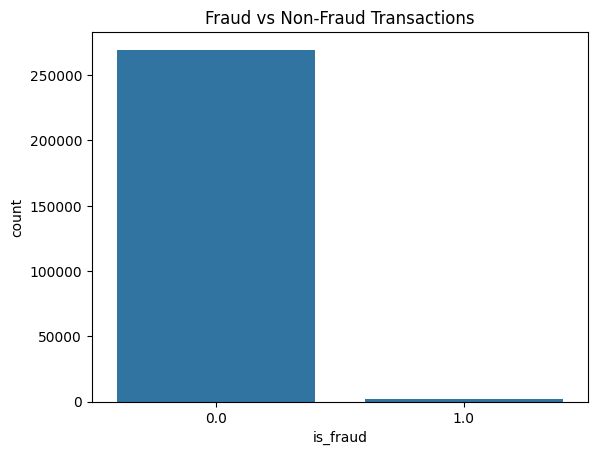

In [4]:
sns.countplot(x='is_fraud', data=train_data)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


In [5]:
# Columns to drop
drop_cols = [
    'Unnamed: 0',
    'trans_date_trans_time',
    'cc_num',
    'first',
    'last',
    'street',
    'city',
    'state',
    'zip',
    'dob',
    'trans_num'
]

# Drop from both train and test
train_data = train_data.drop(columns=drop_cols)
test_data = test_data.drop(columns=drop_cols)

# Check remaining columns
train_data.columns


Index(['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder
le = LabelEncoder()

# List of categorical columns
cat_cols = train_data.select_dtypes(include='object').columns

# Encode categorical columns in train data
for col in cat_cols:
    train_data[col] = le.fit_transform(train_data[col])

# Encode categorical columns in test data
for col in cat_cols:
    test_data[col] = le.fit_transform(test_data[col])

# Check data types
train_data.dtypes


,0
merchant,int64
category,int64
amt,float64
gender,int64
lat,float64
long,float64
city_pop,float64
job,int64
unix_time,float64
merch_lat,float64


In [7]:
# Split features and target
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']

X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

# Check shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((271534, 11), (271534,), (275363, 11), (275363,))

In [9]:
# Check missing values count
train_data.isnull().sum()


,0
merchant,0
category,0
amt,1
gender,0
lat,1
long,1
city_pop,1
job,0
unix_time,1
merch_lat,1


In [10]:
# Fill missing values in training data
for col in train_data.columns:
    if train_data[col].dtype in ['int64', 'float64']:
        train_data[col].fillna(train_data[col].median(), inplace=True)
    else:
        train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Fill missing values in test data
for col in test_data.columns:
    if test_data[col].dtype in ['int64', 'float64']:
        test_data[col].fillna(test_data[col].median(), inplace=True)
    else:
        test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Final check (should be all zeros)
train_data.isnull().sum().sum(), test_data.isnull().sum().sum()


/tmp/ipython-input-1785951352.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
/tmp/ipython-input-1785951352.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

(np.int64(0), np.int64(0))

In [11]:
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']

X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Train the model
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Print evaluation results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Confusion Matrix:
[[273911    243]
 [  1209      0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    274154
         1.0       0.00      0.00      0.00      1209

    accuracy                           0.99    275363
   macro avg       0.50      0.50      0.50    275363
weighted avg       0.99      0.99      0.99    275363



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix (Random Forest):
[[274080     74]
 [   792    417]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    274154
         1.0       0.85      0.34      0.49      1209

    accuracy                           1.00    275363
   macro avg       0.92      0.67      0.74    275363
weighted avg       1.00      1.00      1.00    275363



In [14]:
# Get feature importance from Random Forest
importances = rf.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

# Display top 10 important features
feature_importance_df.head(10)


,Feature,Importance
2,amt,0.422951
1,category,0.170319
8,unix_time,0.071364
10,merch_long,0.055689
9,merch_lat,0.052170
6,city_pop,0.050783
7,job,0.042875
4,lat,0.042601
5,long,0.041665
0,merchant,0.040541


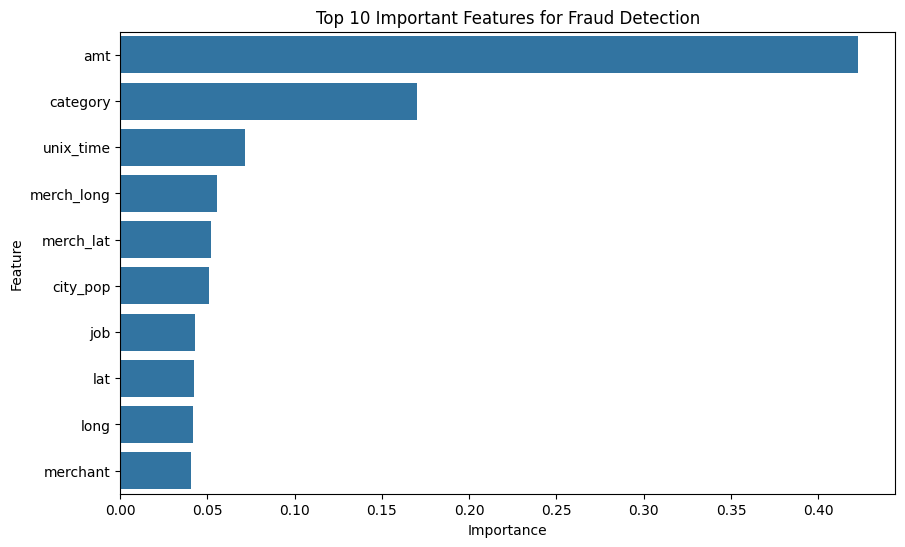

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(10)
)
plt.title("Top 10 Important Features for Fraud Detection")
plt.show()


In [16]:
# Pick one transaction from test set
sample = X_test.iloc[0:1]

# Actual result
actual = y_test.iloc[0]

# Predict using Random Forest
prediction = rf.predict(sample)

print("Actual value:", actual)
print("Predicted value:", prediction[0])


Actual value: 0.0
Predicted value: 0.0


In [17]:
# Test first 10 transactions
predictions = rf.predict(X_test.head(10))

result_df = pd.DataFrame({
    "Actual": y_test.head(10).values,
    "Predicted": predictions
})

result_df


,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [18]:
# Find a fraud transaction
fraud_index = y_test[y_test == 1].index[0]

sample_fraud = X_test.loc[fraud_index:fraud_index]
actual = y_test.loc[fraud_index]

prediction = rf.predict(sample_fraud)

print("Actual:", actual)
print("Predicted:", prediction[0])


Actual: 1.0
Predicted: 0.0
